In [1]:
import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#import EoN
from tqdm import trange
import pandas as pd
import random
from sklearn.model_selection import train_test_split

In [13]:
# Generate an csv-file with parameter values for each seed
seed_number = 0

iterations = 50  # run 5 simulations
tau_boundaries = np.arange(0.04, 0.09, 0.01)         # transmission rate
gamma = 0.08  # recovery rate
rho_boundaries = np.arange(0.005, 0.011, 0.001)     # random fraction initially infected
alpha = 0.1 # latent period rate

parameters = pd.DataFrame(columns = ['seed_number','tau', 'rho'])
for tau in tau_boundaries:
    for rho in rho_boundaries:
        for iter in range(0, iterations):
            parameters = pd.concat([parameters,
                                    pd.DataFrame({'seed_number':[seed_number],
                                                  'tau':[tau],'rho':[rho]})
                                   ],ignore_index=True)
            seed_number += 1 

# save the results to a csv file
parameters#.to_csv('seeds_parameters.csv', index=False)


C:\Users\user\AppData\Local\Temp\ipykernel_25920\3459784117.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  parameters = pd.concat([parameters,


,seed_number,tau,rho
0,0,0.04,0.005
1,1,0.04,0.005
2,2,0.04,0.005
3,3,0.04,0.005
4,4,0.04,0.005
...,...,...,...
1495,1495,0.08,0.010
1496,1496,0.08,0.010
1497,1497,0.08,0.010
1498,1498,0.08,0.010


In [14]:
X = parameters.drop(columns=['tau', 'rho'])
y = parameters[['tau', 'rho']]

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=y)
y = y.loc[X_train.index]
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=42, stratify=y)
X_train = X_train.sort_values(by = ['seed_number'])
X_val = X_val.sort_values(by = ['seed_number'])
X_test = X_test.sort_values(by = ['seed_number'])

In [17]:
parameters['set'] = ''
parameters.loc[parameters.seed_number.isin(X_train.seed_number), 'set'] = 'train'
parameters.loc[parameters.seed_number.isin(X_val.seed_number), 'set'] = 'val'
parameters.loc[parameters.seed_number.isin(X_test.seed_number), 'set'] = 'test'
parameters

,seed_number,tau,rho,set
0,0,0.04,0.005,train
1,1,0.04,0.005,train
2,2,0.04,0.005,train
3,3,0.04,0.005,train
4,4,0.04,0.005,val
...,...,...,...,...
1495,1495,0.08,0.010,val
1496,1496,0.08,0.010,val
1497,1497,0.08,0.010,train
1498,1498,0.08,0.010,train


In [18]:
parameters.set.value_counts()

set
train    960
test     300
val      240
Name: count, dtype: int64

In [19]:
#parameters.to_csv('seeds_set_parameters.csv', index=False)

In [25]:
parameters[parameters.set!='test'].seed_number.values

array([0, 1, 2, ..., 1497, 1498, 1499], dtype=object)

In [6]:
parameters = pd.read_csv('initial_data/seeds_set_parameters.csv')

## barabasi-albert

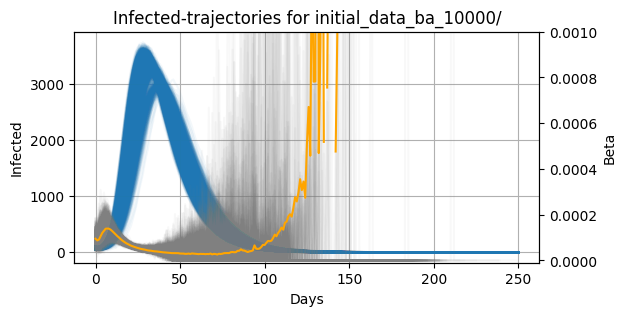

In [9]:
fig, ax = plt.subplots(1,1, figsize=(6, 3)) 
ax_b = ax.twinx()

folder = 'initial_data_ba_10000/'
all_betas = pd.DataFrame()
for i in parameters[parameters.set!='test'].seed_number.values:
    df = pd.read_csv(f'initial_data/{folder}/seir_seed_{i}.csv')
    ax.plot(df['I'].values, alpha=0.05, color = 'tab:blue')
    ax_b.plot(df['Beta'].values, alpha=0.05, color = 'gray')
    
    epidemic_end = df[(df['E'] == 0) & (df['I'] == 0)].index
    if epidemic_end.shape[0]>1:
        df.loc[epidemic_end[1]:,'Beta'] = -2
    all_betas = pd.concat([all_betas, df[['Beta']]], axis=1)

median_b = all_betas[all_betas>0].median(axis=1)
#median_b.to_csv(f'{folder[:-1]}_median.csv', index=False)
ax_b.plot(median_b, ls='-', color='orange', label='$\mathregular{M_{median}}$')

ax.set_xlabel('Days')
ax.set_ylabel('Infected')
ax_b.set_ylabel('Beta')
ax_b.set_ylim(-1e-5,1e-3)

ax.set_title(f'Infected-trajectories for {folder}')
#plt.ylim([0,500])
ax.grid()

In [2]:
parameters_n = pd.read_csv('initial_data/new_seeds_parameters.csv')

In [9]:
parameters_n[parameters_n.set!='test'].file.values[0].split('\\')[-1]

'p_0.04_0.1_0.08_0.005_0_seed_0.csv'

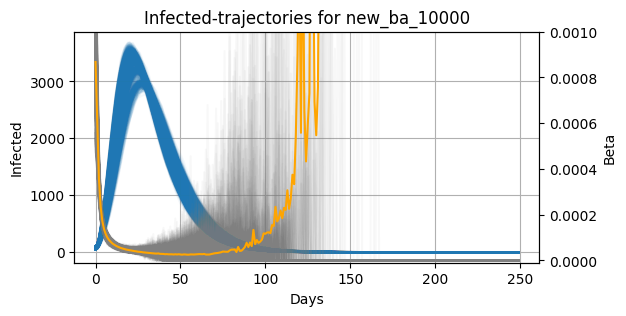

In [2]:
fig, ax = plt.subplots(1,1, figsize=(6, 3)) 
ax_b = ax.twinx()

folder = 'initial_data/new_ba_10000/'
parameters_n = pd.read_csv('initial_data/new_seeds_parameters.csv')
all_betas = pd.DataFrame()

for i in parameters_n[parameters_n.set!='test'].file.values:
    df = pd.read_csv(folder + i.split('\\')[-1])
    ax.plot(df['I'].values, alpha=0.05, color = 'tab:blue')
    ax_b.plot(df['Beta'].values, alpha=0.05, color = 'gray')
    
    epidemic_end = df[(df['E'] == 0) & (df['I'] == 0)].index
    if epidemic_end.shape[0]>1:
        df.loc[epidemic_end[1]:,'Beta'] = -2
    all_betas = pd.concat([all_betas, df[['Beta']]], axis=1)

median_b = all_betas[all_betas>0].median(axis=1)
#median_b.to_csv(f'{folder[:-1]}_median.csv', index=False)
ax_b.plot(median_b, ls='-', color='orange', label='$\mathregular{M_{median}}$')

ax.set_xlabel('Days')
ax.set_ylabel('Infected')
ax_b.set_ylabel('Beta')
ax_b.set_ylim(-1e-5,1e-3)

ax.set_title(f'Infected-trajectories for {folder}')
#plt.ylim([0,500])
ax.grid()

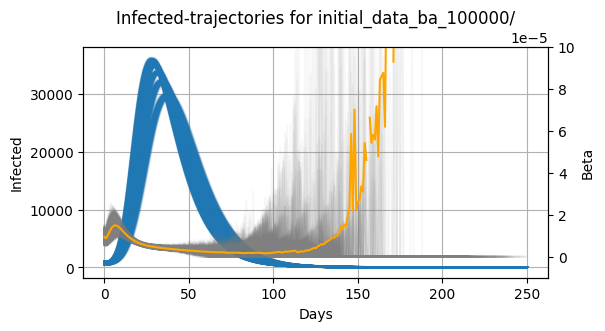

In [67]:
fig, ax = plt.subplots(1,1, figsize=(6, 3)) 
ax_b = ax.twinx()

folder = 'initial_data_ba_100000/'
all_betas = pd.DataFrame()
for i in parameters[parameters.set!='test'].seed_number.values:
    df = pd.read_csv(f'{folder}/seir_seed_{i}.csv')
    ax.plot(df['I'].values, alpha=0.05, color = 'tab:blue')
    ax_b.plot(df['Beta'].values, alpha=0.05, color = 'gray')
    
    epidemic_end = df[(df['E'] == 0) & (df['I'] == 0)].index
    if epidemic_end.shape[0]>1:
        df.loc[epidemic_end[1]:,'Beta'] = -2
    all_betas = pd.concat([all_betas, df[['Beta']]], axis=1)

median_b = all_betas[all_betas>0].median(axis=1)
median_b.to_csv(f'{folder[:-1]}_median.csv', index=False)
ax_b.plot(median_b, ls='-', color='orange', label='$\mathregular{M_{median}}$')
    
ax.set_xlabel('Days')
ax.set_ylabel('Infected')
ax_b.set_ylabel('Beta')
ax_b.set_ylim(-1e-5,1e-4)

ax.set_title(f'Infected-trajectories for {folder}')
#plt.ylim([0,500])
ax.grid()

## random

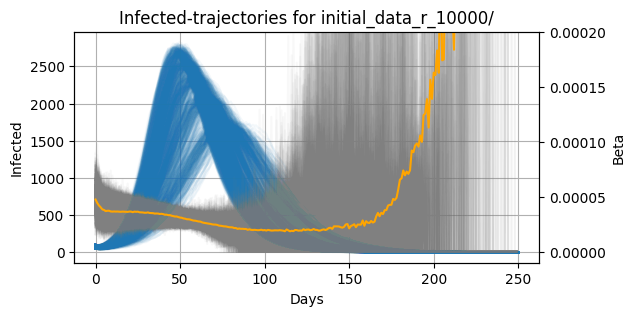

In [68]:
fig, ax = plt.subplots(1,1, figsize=(6, 3)) 
ax_b = ax.twinx()

folder = 'initial_data_r_10000/'

all_betas = pd.DataFrame()
for i in parameters[parameters.set!='test'].seed_number.values:
    df = pd.read_csv(f'{folder}/seir_seed_{i}.csv')
    ax.plot(df['I'].values, alpha=0.05, color = 'tab:blue')
    ax_b.plot(df['Beta'].values, alpha=0.05, color = 'gray')
    
    epidemic_end = df[(df['E'] == 0) & (df['I'] == 0)].index
    if epidemic_end.shape[0]>1:
        df.loc[epidemic_end[1]:,'Beta'] = -2
    all_betas = pd.concat([all_betas, df[['Beta']]], axis=1)

median_b = all_betas[all_betas>0].median(axis=1)
median_b.to_csv(f'{folder[:-1]}_median.csv', index=False)
ax_b.plot(median_b, ls='-', color='orange', label='$\mathregular{M_{median}}$')
    
ax.set_xlabel('Days')
ax.set_ylabel('Infected')
ax_b.set_ylabel('Beta')
ax_b.set_ylim(-1e-5,2e-4)

ax.set_title(f'Infected-trajectories for {folder}')
#plt.ylim([0,500])
ax.grid()

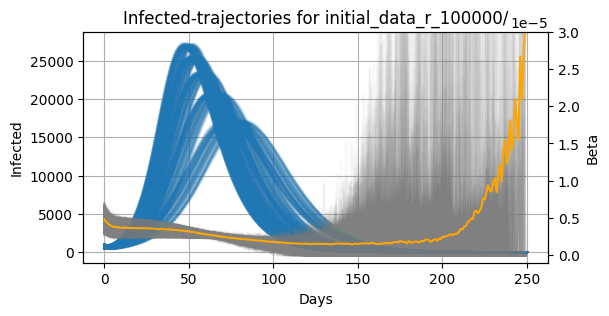

In [69]:
fig, ax = plt.subplots(1,1, figsize=(6, 3)) 
ax_b = ax.twinx()

folder = 'initial_data_r_100000/'

all_betas = pd.DataFrame()
for i in parameters[parameters.set!='test'].seed_number.values:
    df = pd.read_csv(f'{folder}/seir_seed_{i}.csv')
    ax.plot(df['I'].values, alpha=0.05, color = 'tab:blue')
    ax_b.plot(df['Beta'].values, alpha=0.05, color = 'gray')
    
    epidemic_end = df[(df['E'] == 0) & (df['I'] == 0)].index
    if epidemic_end.shape[0]>1:
        df.loc[epidemic_end[1]:,'Beta'] = -2
    all_betas = pd.concat([all_betas, df[['Beta']]], axis=1)

median_b = all_betas[all_betas>0].median(axis=1)
median_b.to_csv(f'{folder[:-1]}_median.csv', index=False)
ax_b.plot(median_b, ls='-', color='orange', label='$\mathregular{M_{median}}$')
    
ax.set_xlabel('Days')
ax.set_ylabel('Infected')
ax_b.set_ylabel('Beta')
ax_b.set_ylim(-1e-6,3e-5)

ax.set_title(f'Infected-trajectories for {folder}')
#plt.ylim([0,500])
ax.grid()

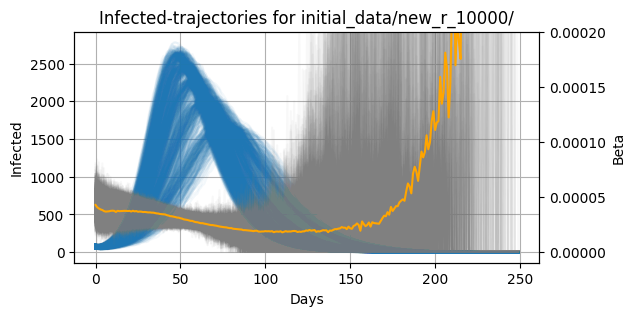

In [13]:
fig, ax = plt.subplots(1,1, figsize=(6, 3)) 
ax_b = ax.twinx()

folder = 'initial_data/new_r_10000/'
parameters_n = pd.read_csv('initial_data/new_seeds_parameters.csv')
all_betas = pd.DataFrame()

for i in parameters_n[parameters_n.set!='test'].file.values:
    df = pd.read_csv(folder + i.split('\\')[-1])
    ax.plot(df['I'].values, alpha=0.05, color = 'tab:blue')
    ax_b.plot(df['Beta'].values, alpha=0.05, color = 'gray')
    
    epidemic_end = df[(df['E'] == 0) & (df['I'] == 0)].index
    if epidemic_end.shape[0]>1:
        df.loc[epidemic_end[1]:,'Beta'] = -2
    all_betas = pd.concat([all_betas, df[['Beta']]], axis=1)

median_b = all_betas[all_betas>0].median(axis=1)
#median_b.to_csv(f'{folder[:-1]}_median.csv', index=False)
ax_b.plot(median_b, ls='-', color='orange', label='$\mathregular{M_{median}}$')

ax.set_xlabel('Days')
ax.set_ylabel('Infected')
ax_b.set_ylabel('Beta')
ax_b.set_ylim(-1e-5,2e-4)

ax.set_title(f'Infected-trajectories for {folder}')
#plt.ylim([0,500])
ax.grid()

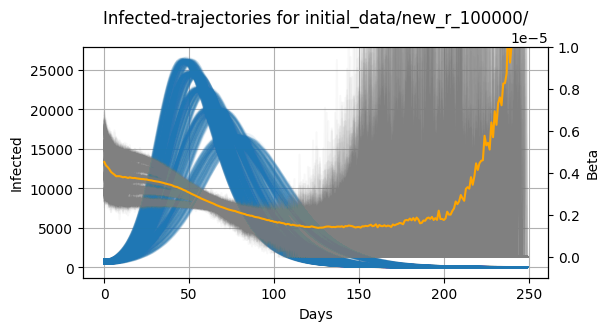

In [21]:
fig, ax = plt.subplots(1,1, figsize=(6, 3)) 
ax_b = ax.twinx()

folder = 'initial_data/new_r_100000/'
parameters_n = pd.read_csv('initial_data/new_seeds_parameters.csv')
all_betas = pd.DataFrame()

for i in parameters_n[parameters_n.set!='test'].file.values:
    df = pd.read_csv(folder + i.split('\\')[-1])
    ax.plot(df['I'].values, alpha=0.05, color = 'tab:blue')
    ax_b.plot(df['Beta'].values, alpha=0.05, color = 'gray')
    
    epidemic_end = df[(df['E'] == 0) & (df['I'] == 0)].index
    if epidemic_end.shape[0]>1:
        df.loc[epidemic_end[1]:,'Beta'] = -2
    all_betas = pd.concat([all_betas, df[['Beta']]], axis=1)

median_b = all_betas[all_betas>0].median(axis=1)
#median_b.to_csv(f'{folder[:-1]}_median.csv', index=False)
ax_b.plot(median_b, ls='-', color='orange', label='$\mathregular{M_{median}}$')

ax.set_xlabel('Days')
ax.set_ylabel('Infected')
ax_b.set_ylabel('Beta')
ax_b.set_ylim(-1e-6,1e-5)

ax.set_title(f'Infected-trajectories for {folder}')
#plt.ylim([0,500])
ax.grid()

In [8]:
parameters_n[parameters_n.set!='test'
                                    ].file.values.shape

(1200,)

In [25]:
beta_arr = np.arange(0.1, 1, 0.01) #np.arange(0.04, 0.09, 0.01)
alpha_arr = np.arange(0.2, 1, 0.01)

In [29]:
beta_arr.shape[0], alpha_arr.shape[0]

(90, 80)

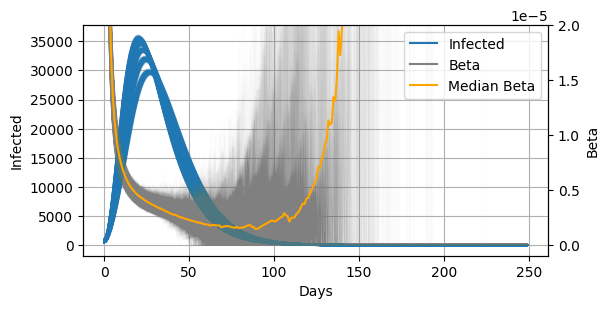

In [23]:
fig, ax = plt.subplots(1,1, figsize=(6, 3)) 
ax_b = ax.twinx()

folder = 'initial_data/new_ba_100000/'
parameters_n = pd.read_csv('initial_data/new_seeds_parameters.csv')
all_betas = pd.DataFrame()

for idx, i in enumerate(parameters_n[parameters_n.set!='test'
                                    ].file.values):
    df = pd.read_csv(folder + i.split('\\')[-1])
    if idx==0:
        il = 'Infected'
        bl = 'Beta'
    else:
        il, bl = '', ''
    ax.plot(df['I'].values, alpha=0.05, color = 'tab:blue', label=il)
    ax_b.plot(df['Beta'].values, alpha=0.02, color = 'gray', label=bl)
    
    df = df[(df['E']> 0) | (df['I'] > 0)]
    
    all_betas = pd.concat([all_betas, df[['Beta']]], axis=1)

median_b = all_betas[all_betas>0].median(axis=1)
#median_b.to_csv(f'{folder[:-1]}_median.csv', index=False)
l3 = ax_b.plot(median_b, ls='-', color='orange', label='Median Beta')

ax.set_xlabel('Days')
ax.set_ylabel('Infected')
ax_b.set_ylabel('Beta')
ax_b.set_ylim(-1e-6,2e-5)

il = 'Infected'
bl = 'Beta'
l1 = ax.plot(df['I'].values, alpha=0.0, color = 'tab:blue', label=il)
l2 = ax_b.plot(df['Beta'].values, alpha=0.0, color = 'gray', label=bl)

lns = l1+l2+l3
labs = [l.get_label() for l in lns]

leg = ax.legend(lns, labs)
for lh in leg.legend_handles: 
    lh.set_alpha(1)
leg.set_zorder(99)

#ax.set_title(f'Infected-trajectories for {folder}')
#plt.ylim([0,500])
ax.grid()

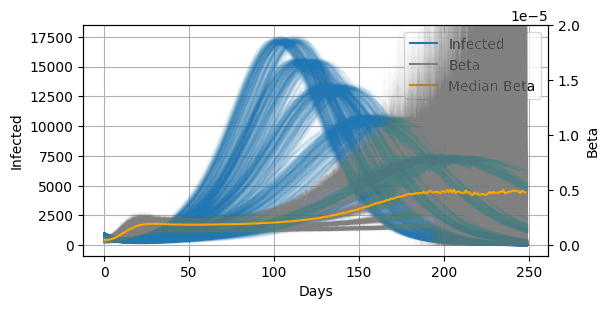

In [24]:
fig, ax = plt.subplots(1,1, figsize=(6, 3)) 
ax_b = ax.twinx()

folder = 'initial_data/new_sw_100000/'
parameters_n = pd.read_csv('initial_data/new_seeds_parameters.csv')
all_betas = pd.DataFrame()

for idx, i in enumerate(parameters_n[parameters_n.set!='test'
                                    ].file.values):
    df = pd.read_csv(folder + i.split('\\')[-1])
    if idx==0:
        il = 'Infected'
        bl = 'Beta'
    else:
        il, bl = '', ''
    ax.plot(df['I'].values, alpha=0.05, color = 'tab:blue', label=il)
    ax_b.plot(df['Beta'].values, alpha=0.02, color = 'gray', label=bl)
    
    df = df[(df['E']> 0) | (df['I'] > 0)]
    
    all_betas = pd.concat([all_betas, df[['Beta']]], axis=1)

median_b = all_betas[all_betas>0].median(axis=1)
#median_b.to_csv(f'{folder[:-1]}_median.csv', index=False)
l3 = ax_b.plot(median_b, ls='-', color='orange', label='Median Beta')

ax.set_xlabel('Days')
ax.set_ylabel('Infected')
ax_b.set_ylabel('Beta')
ax_b.set_ylim(-1e-6,2e-5)

il = 'Infected'
bl = 'Beta'
l1 = ax.plot(df['I'].values, alpha=0.0, color = 'tab:blue', label=il)
l2 = ax_b.plot(df['Beta'].values, alpha=0.0, color = 'gray', label=bl)

lns = l1+l2+l3
labs = [l.get_label() for l in lns]

leg = ax.legend(lns, labs)
for lh in leg.legend_handles: 
    lh.set_alpha(1)
leg.set_zorder(99)

#ax.set_title(f'Infected-trajectories for {folder}')
#plt.ylim([0,500])
ax.grid()

## swall world

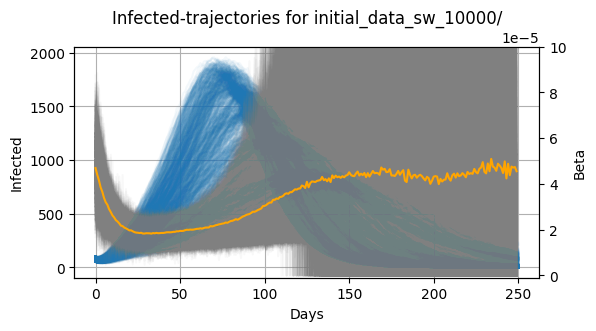

In [70]:
fig, ax = plt.subplots(1,1, figsize=(6, 3)) 
ax_b = ax.twinx()

folder = 'initial_data_sw_10000/'

all_betas = pd.DataFrame()
for i in parameters[parameters.set!='test'].seed_number.values:
    df = pd.read_csv(f'{folder}/seir_seed_{i}.csv')
    ax.plot(df['I'].values, alpha=0.05, color = 'tab:blue')
    ax_b.plot(df['Beta'].values, alpha=0.05, color = 'gray')
    
    epidemic_end = df[(df['E'] == 0) & (df['I'] == 0)].index
    if epidemic_end.shape[0]>1:
        df.loc[epidemic_end[1]:,'Beta'] = -2
    all_betas = pd.concat([all_betas, df[['Beta']]], axis=1)

median_b = all_betas[all_betas>0].median(axis=1)
median_b.to_csv(f'{folder[:-1]}_median.csv', index=False)
ax_b.plot(median_b, ls='-', color='orange', label='$\mathregular{M_{median}}$')

ax.set_xlabel('Days')
ax.set_ylabel('Infected')
ax_b.set_ylabel('Beta')
ax_b.set_ylim(-1e-6,1e-4)

ax.set_title(f'Infected-trajectories for {folder}')
#plt.ylim([0,500])
ax.grid()

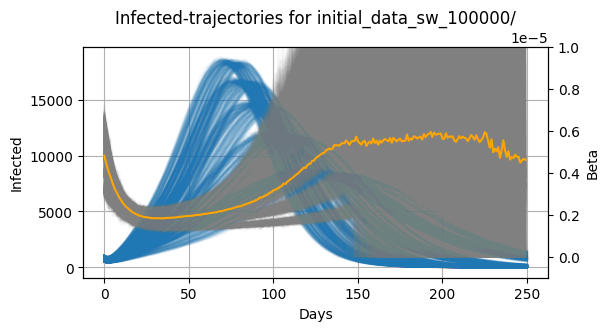

In [71]:
fig, ax = plt.subplots(1,1, figsize=(6, 3)) 
ax_b = ax.twinx()

folder = 'initial_data_sw_100000/'

all_betas = pd.DataFrame()
for i in parameters[parameters.set!='test'].seed_number.values:
    df = pd.read_csv(f'{folder}/seir_seed_{i}.csv')
    ax.plot(df['I'].values, alpha=0.05, color = 'tab:blue')
    ax_b.plot(df['Beta'].values, alpha=0.05, color = 'gray')
    
    epidemic_end = df[(df['E'] == 0) & (df['I'] == 0)].index
    if epidemic_end.shape[0]>1:
        df.loc[epidemic_end[1]:,'Beta'] = -2
    all_betas = pd.concat([all_betas, df[['Beta']]], axis=1)

median_b = all_betas[all_betas>0].median(axis=1)
median_b.to_csv(f'{folder[:-1]}_median.csv', index=False)
ax_b.plot(median_b, ls='-', color='orange', label='$\mathregular{M_{median}}$')
    
ax.set_xlabel('Days')
ax.set_ylabel('Infected')
ax_b.set_ylabel('Beta')
ax_b.set_ylim(-1e-6,1e-5)

ax.set_title(f'Infected-trajectories for {folder}')
#plt.ylim([0,500])
ax.grid()